<a href="https://colab.research.google.com/github/jayjain4554/DAI/blob/main/jay_j.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55450 entries, 0 to 55449
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Parameters                               55450 non-null  object 
 1   Random                                   55450 non-null  object 
 2   Plant Height (PH)                        55450 non-null  float64
 3   Number of Pods (NP)                      55450 non-null  float64
 4   Biological Weight (BW)                   55450 non-null  float64
 5   Sugars (Su)                              55450 non-null  float64
 6   Relative Water Content in Leaves (RWCL)  55450 non-null  float64
 7   ChlorophyllA663                          55450 non-null  float64
 8   Chlorophyllb649                          55450 non-null  float64
 9   Protein Percentage (PPE)                 55450 non-null  float64
 10  Weight of 300 Seeds (W3S)   

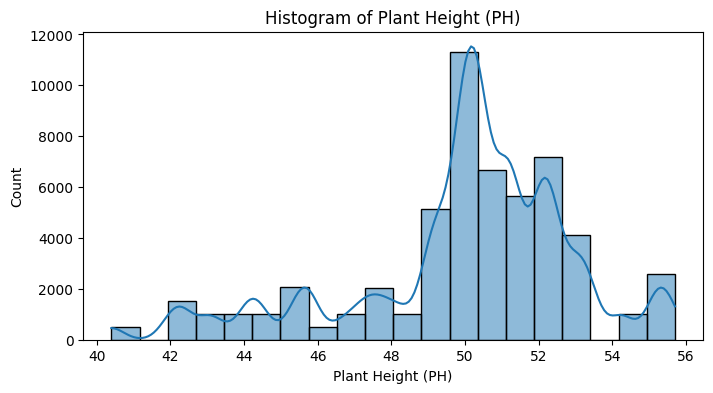

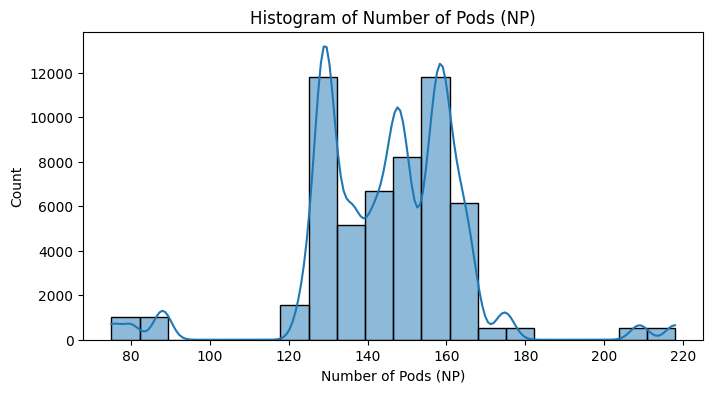

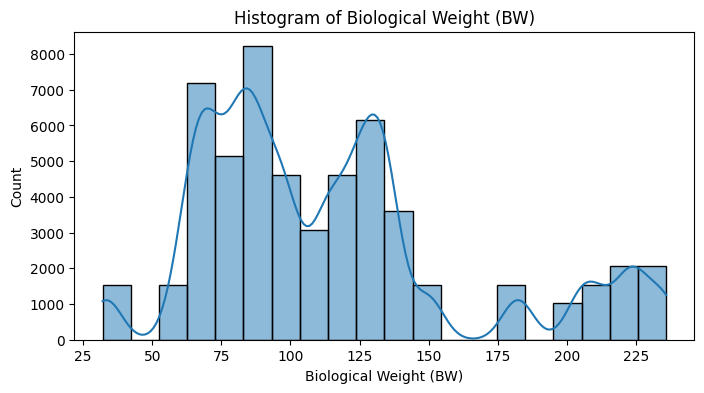

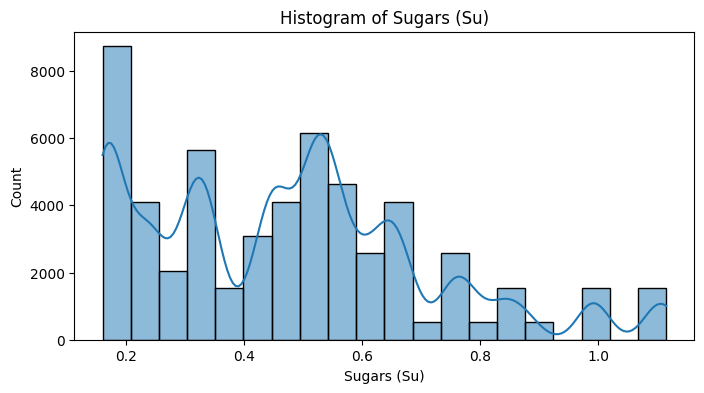

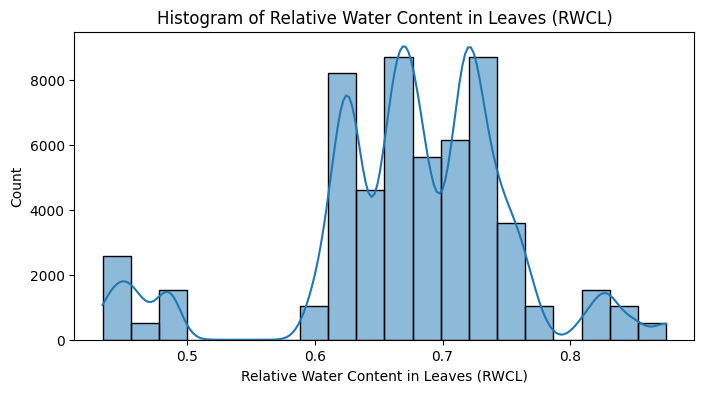

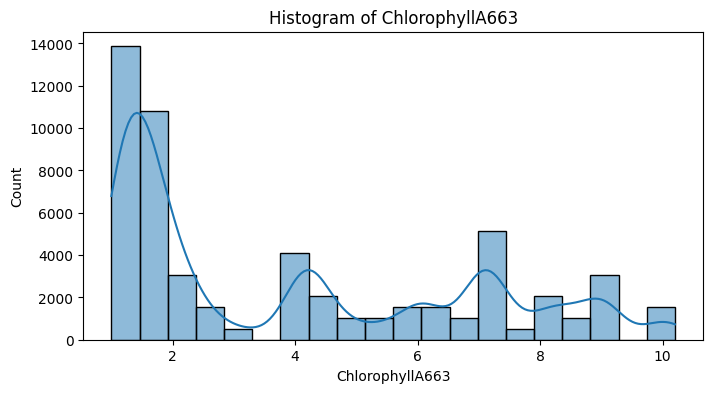

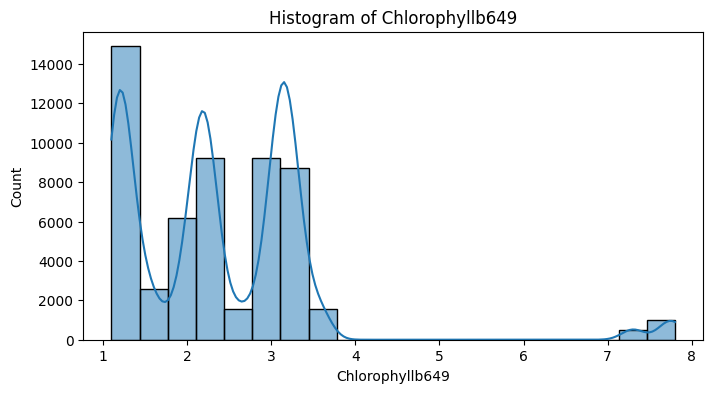

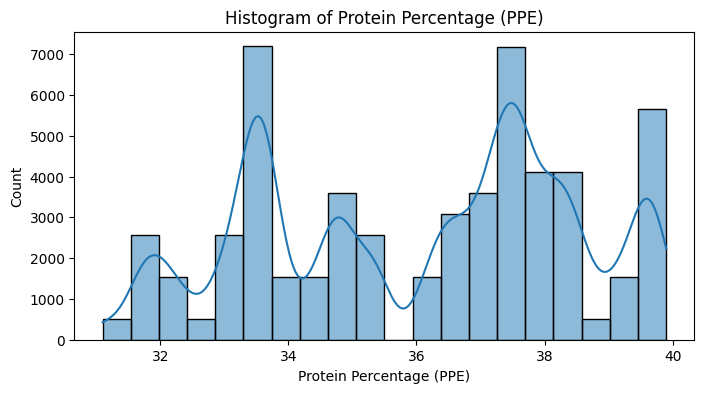

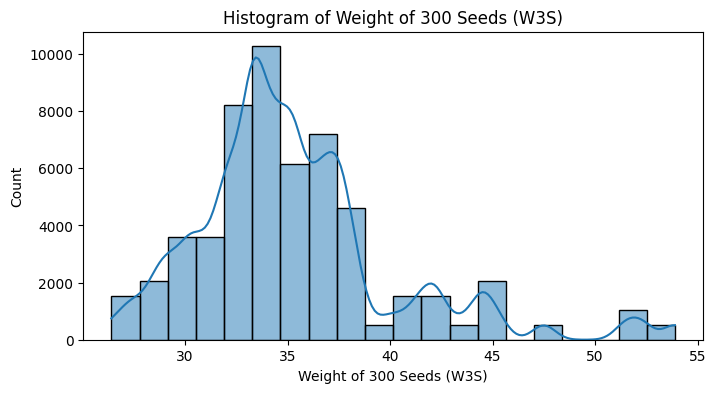

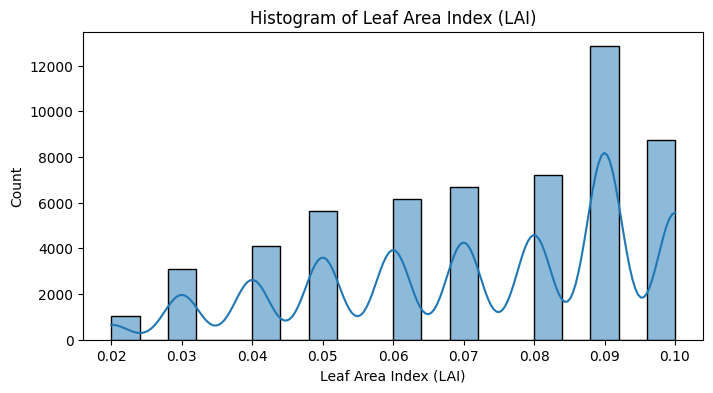

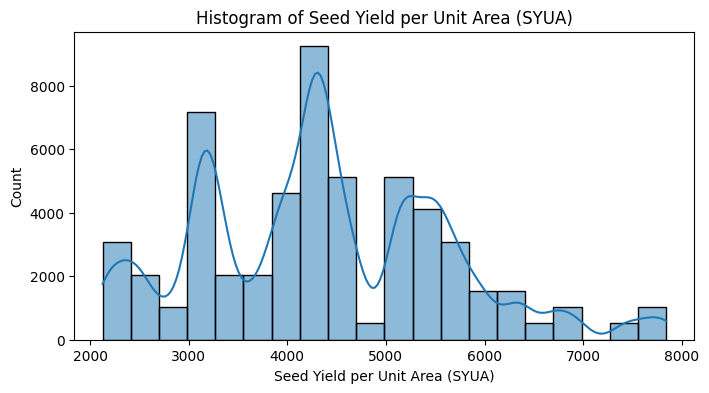

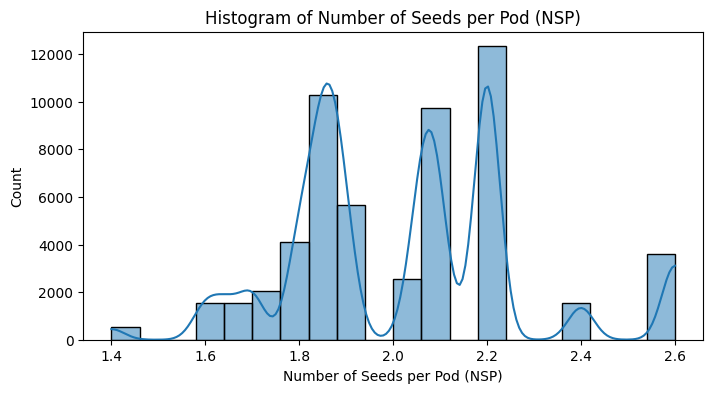

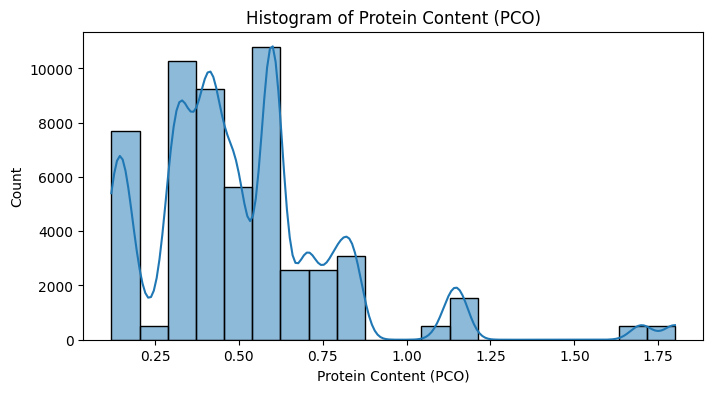

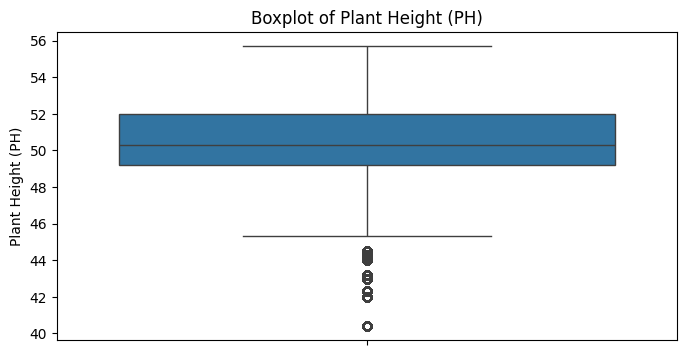

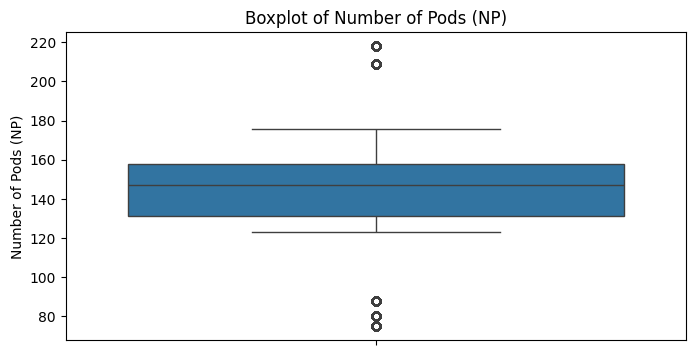

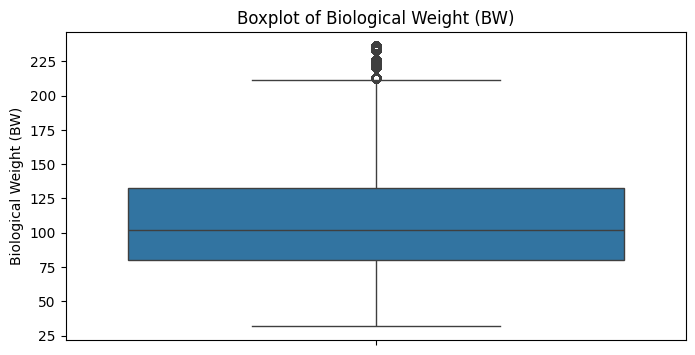

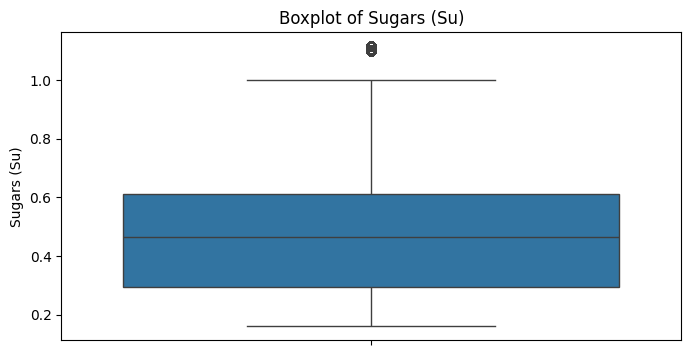

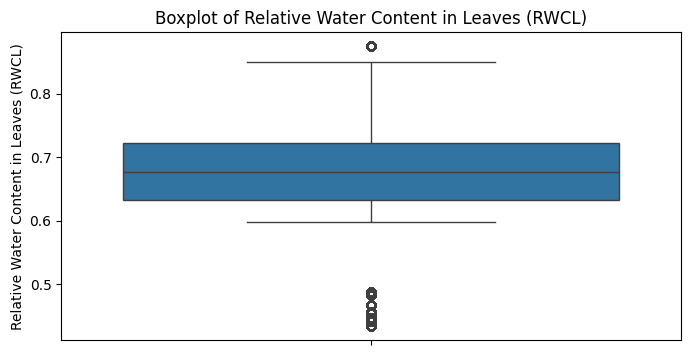

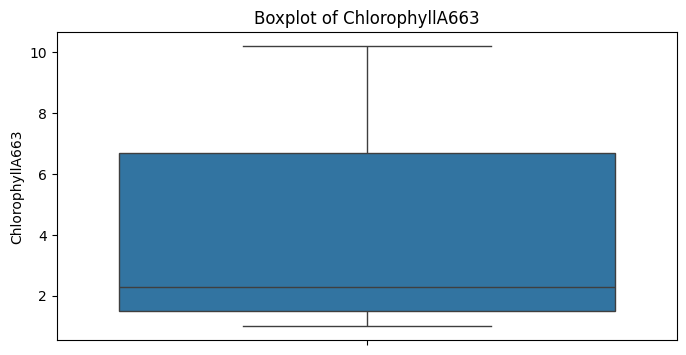

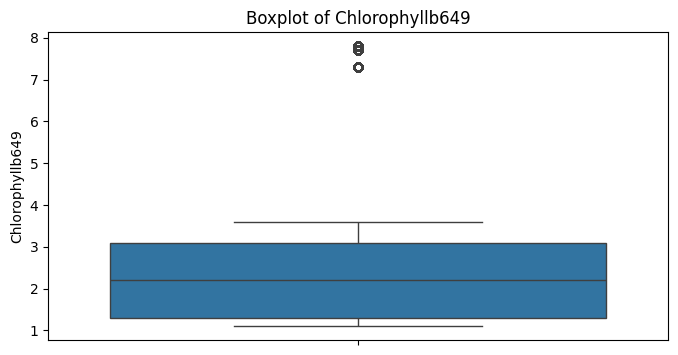

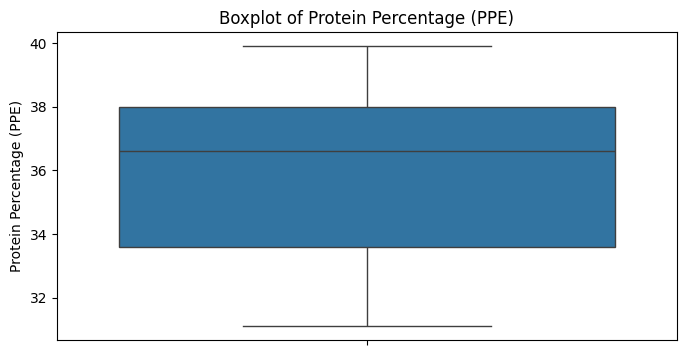

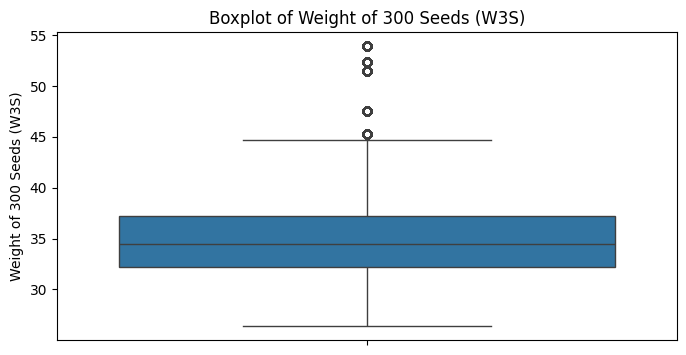

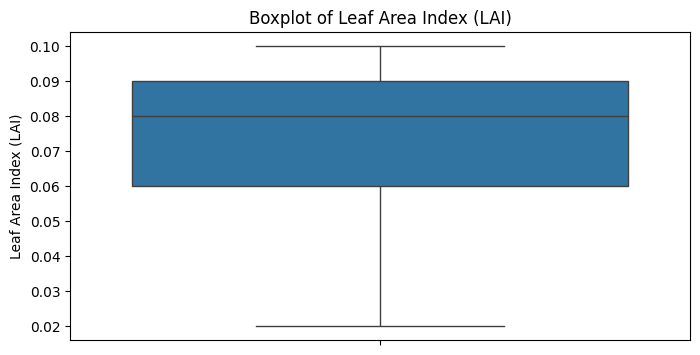

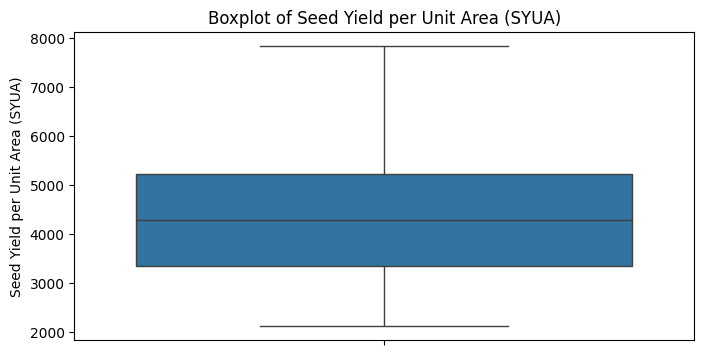

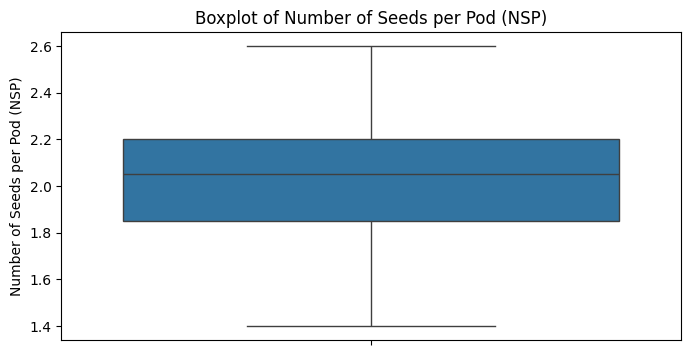

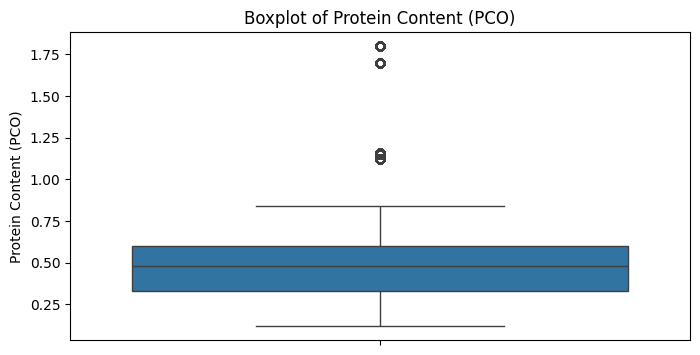

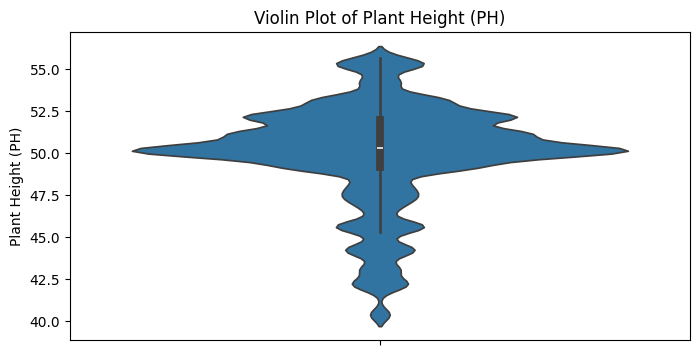

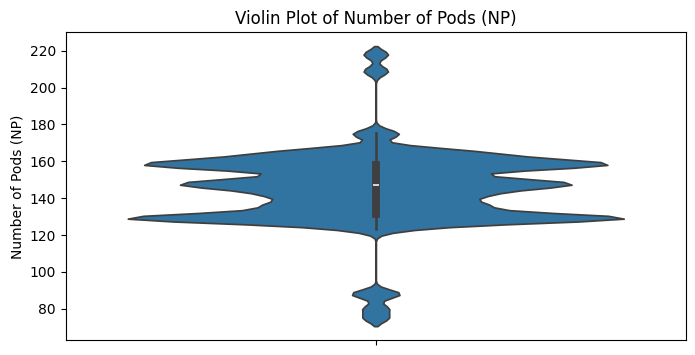

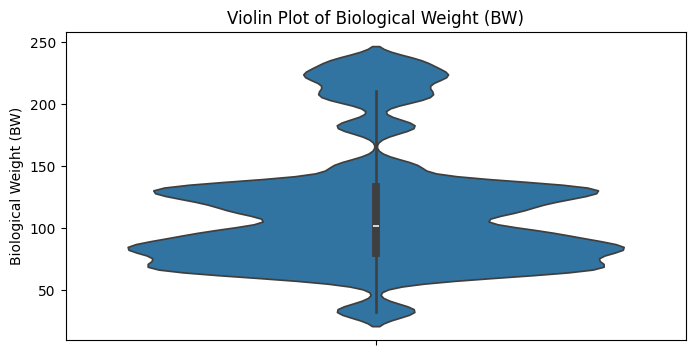

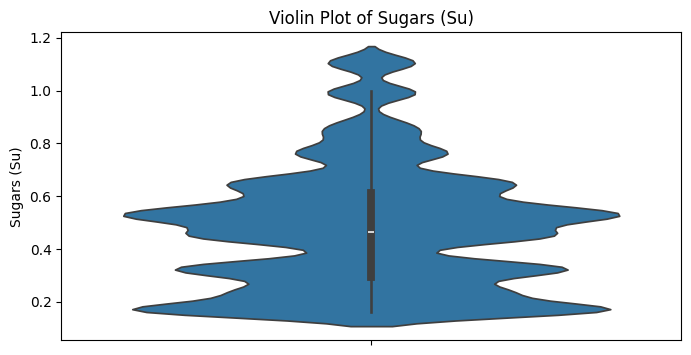

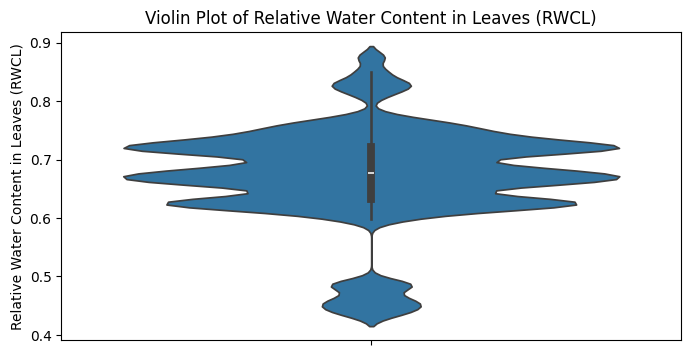

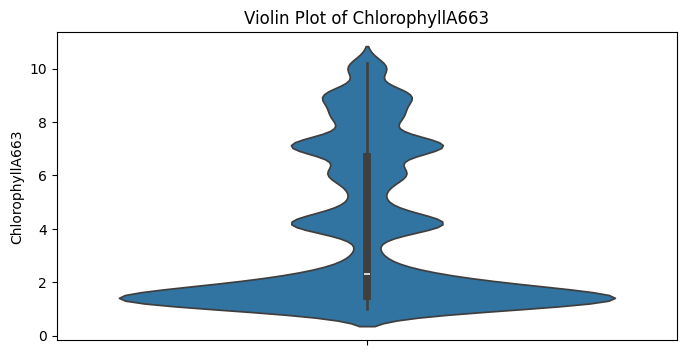

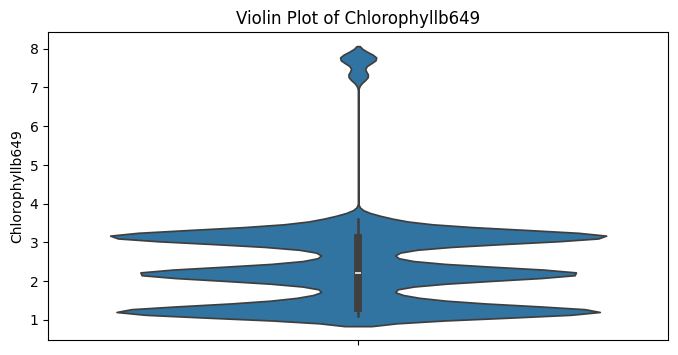

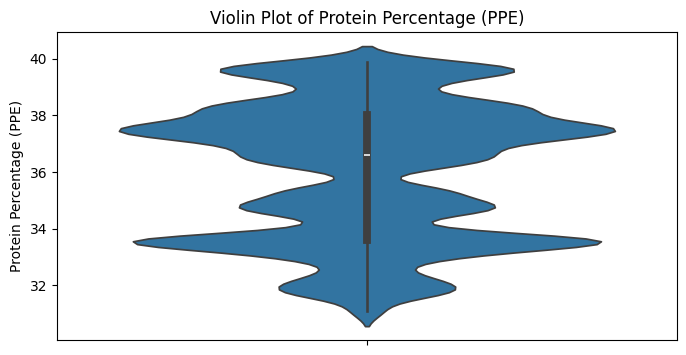

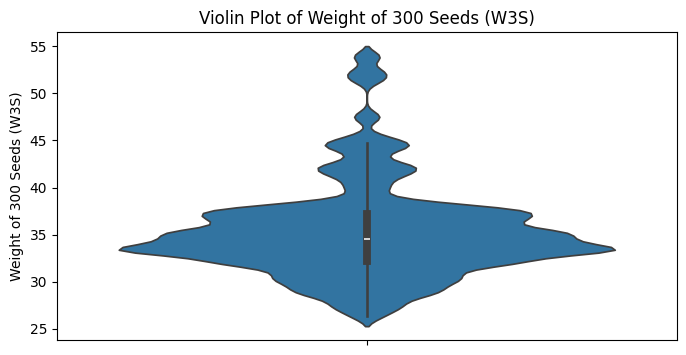

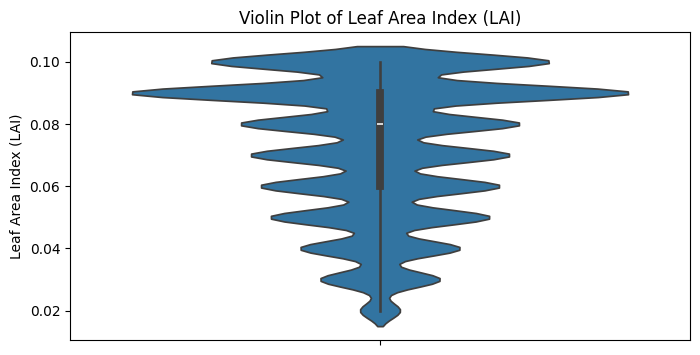

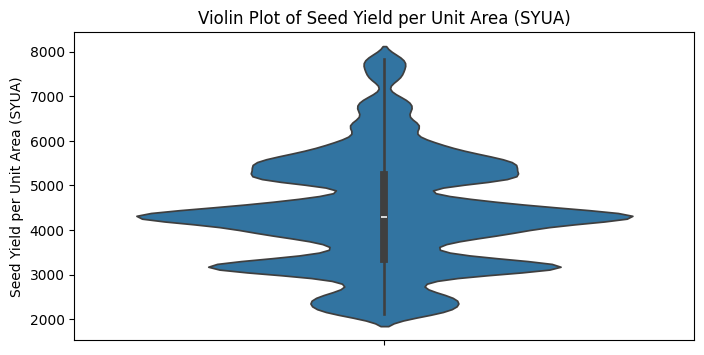

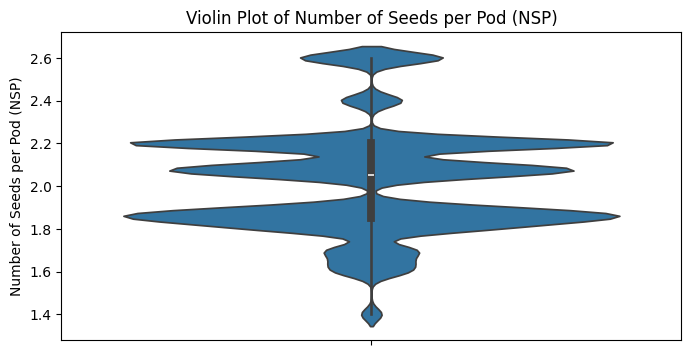

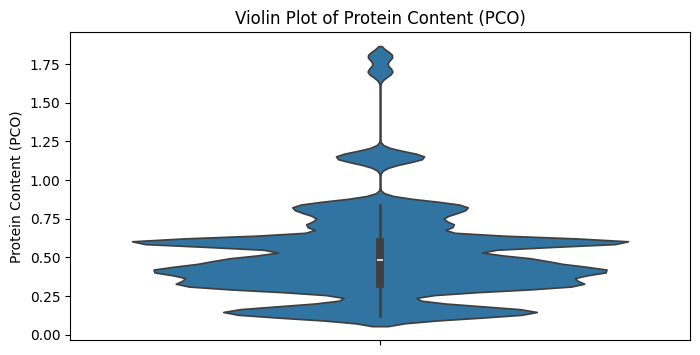

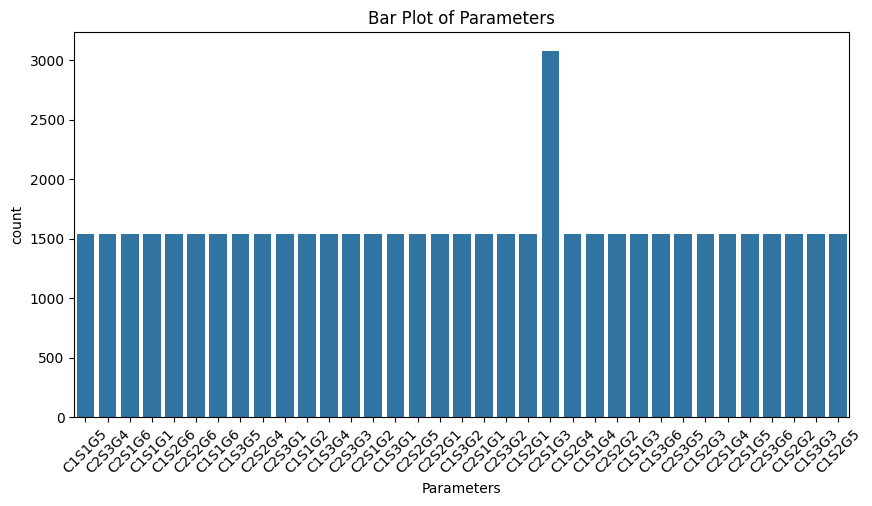

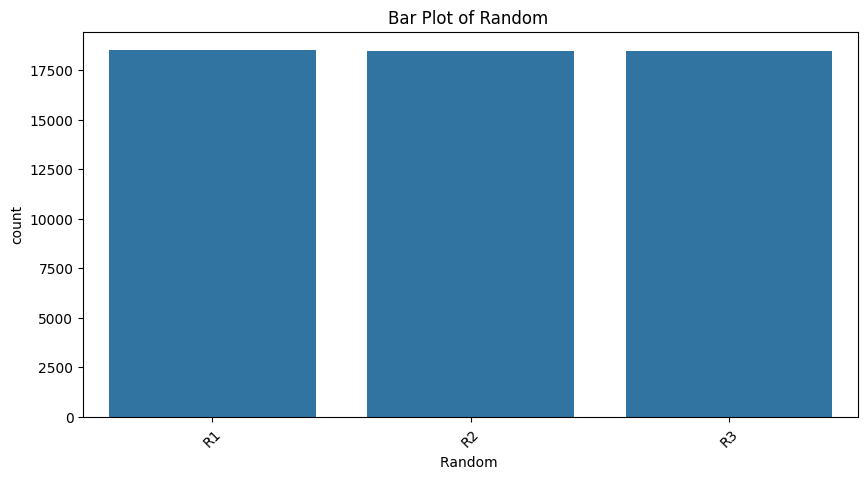

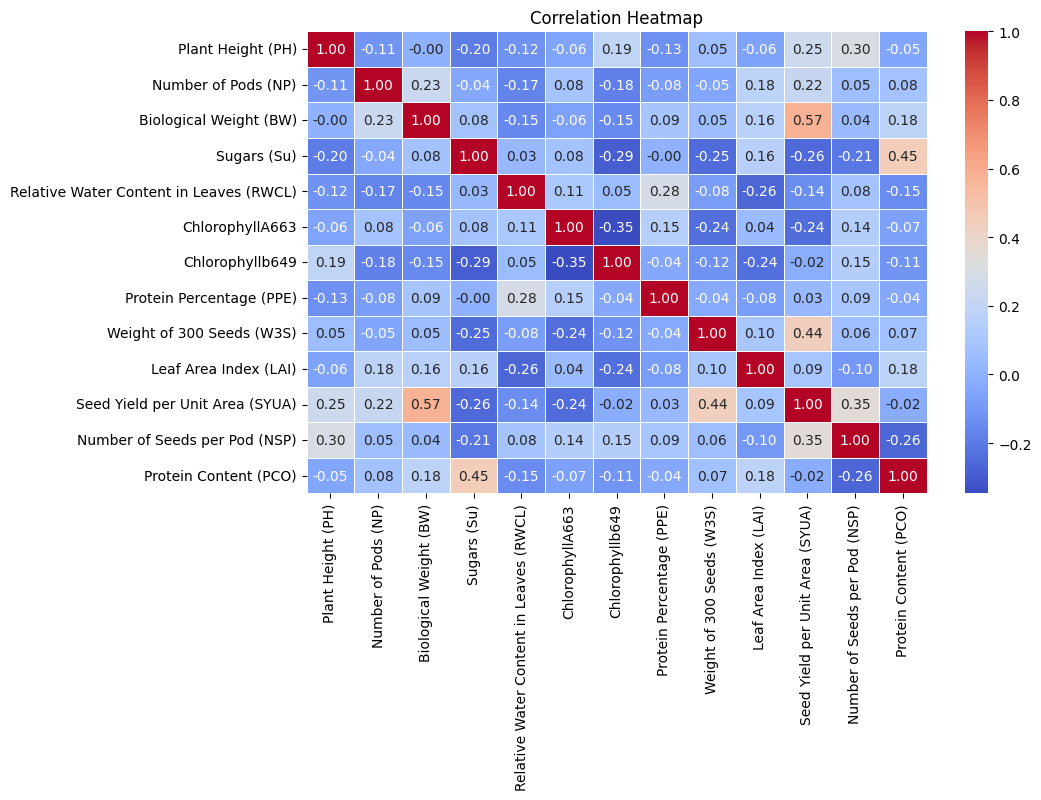

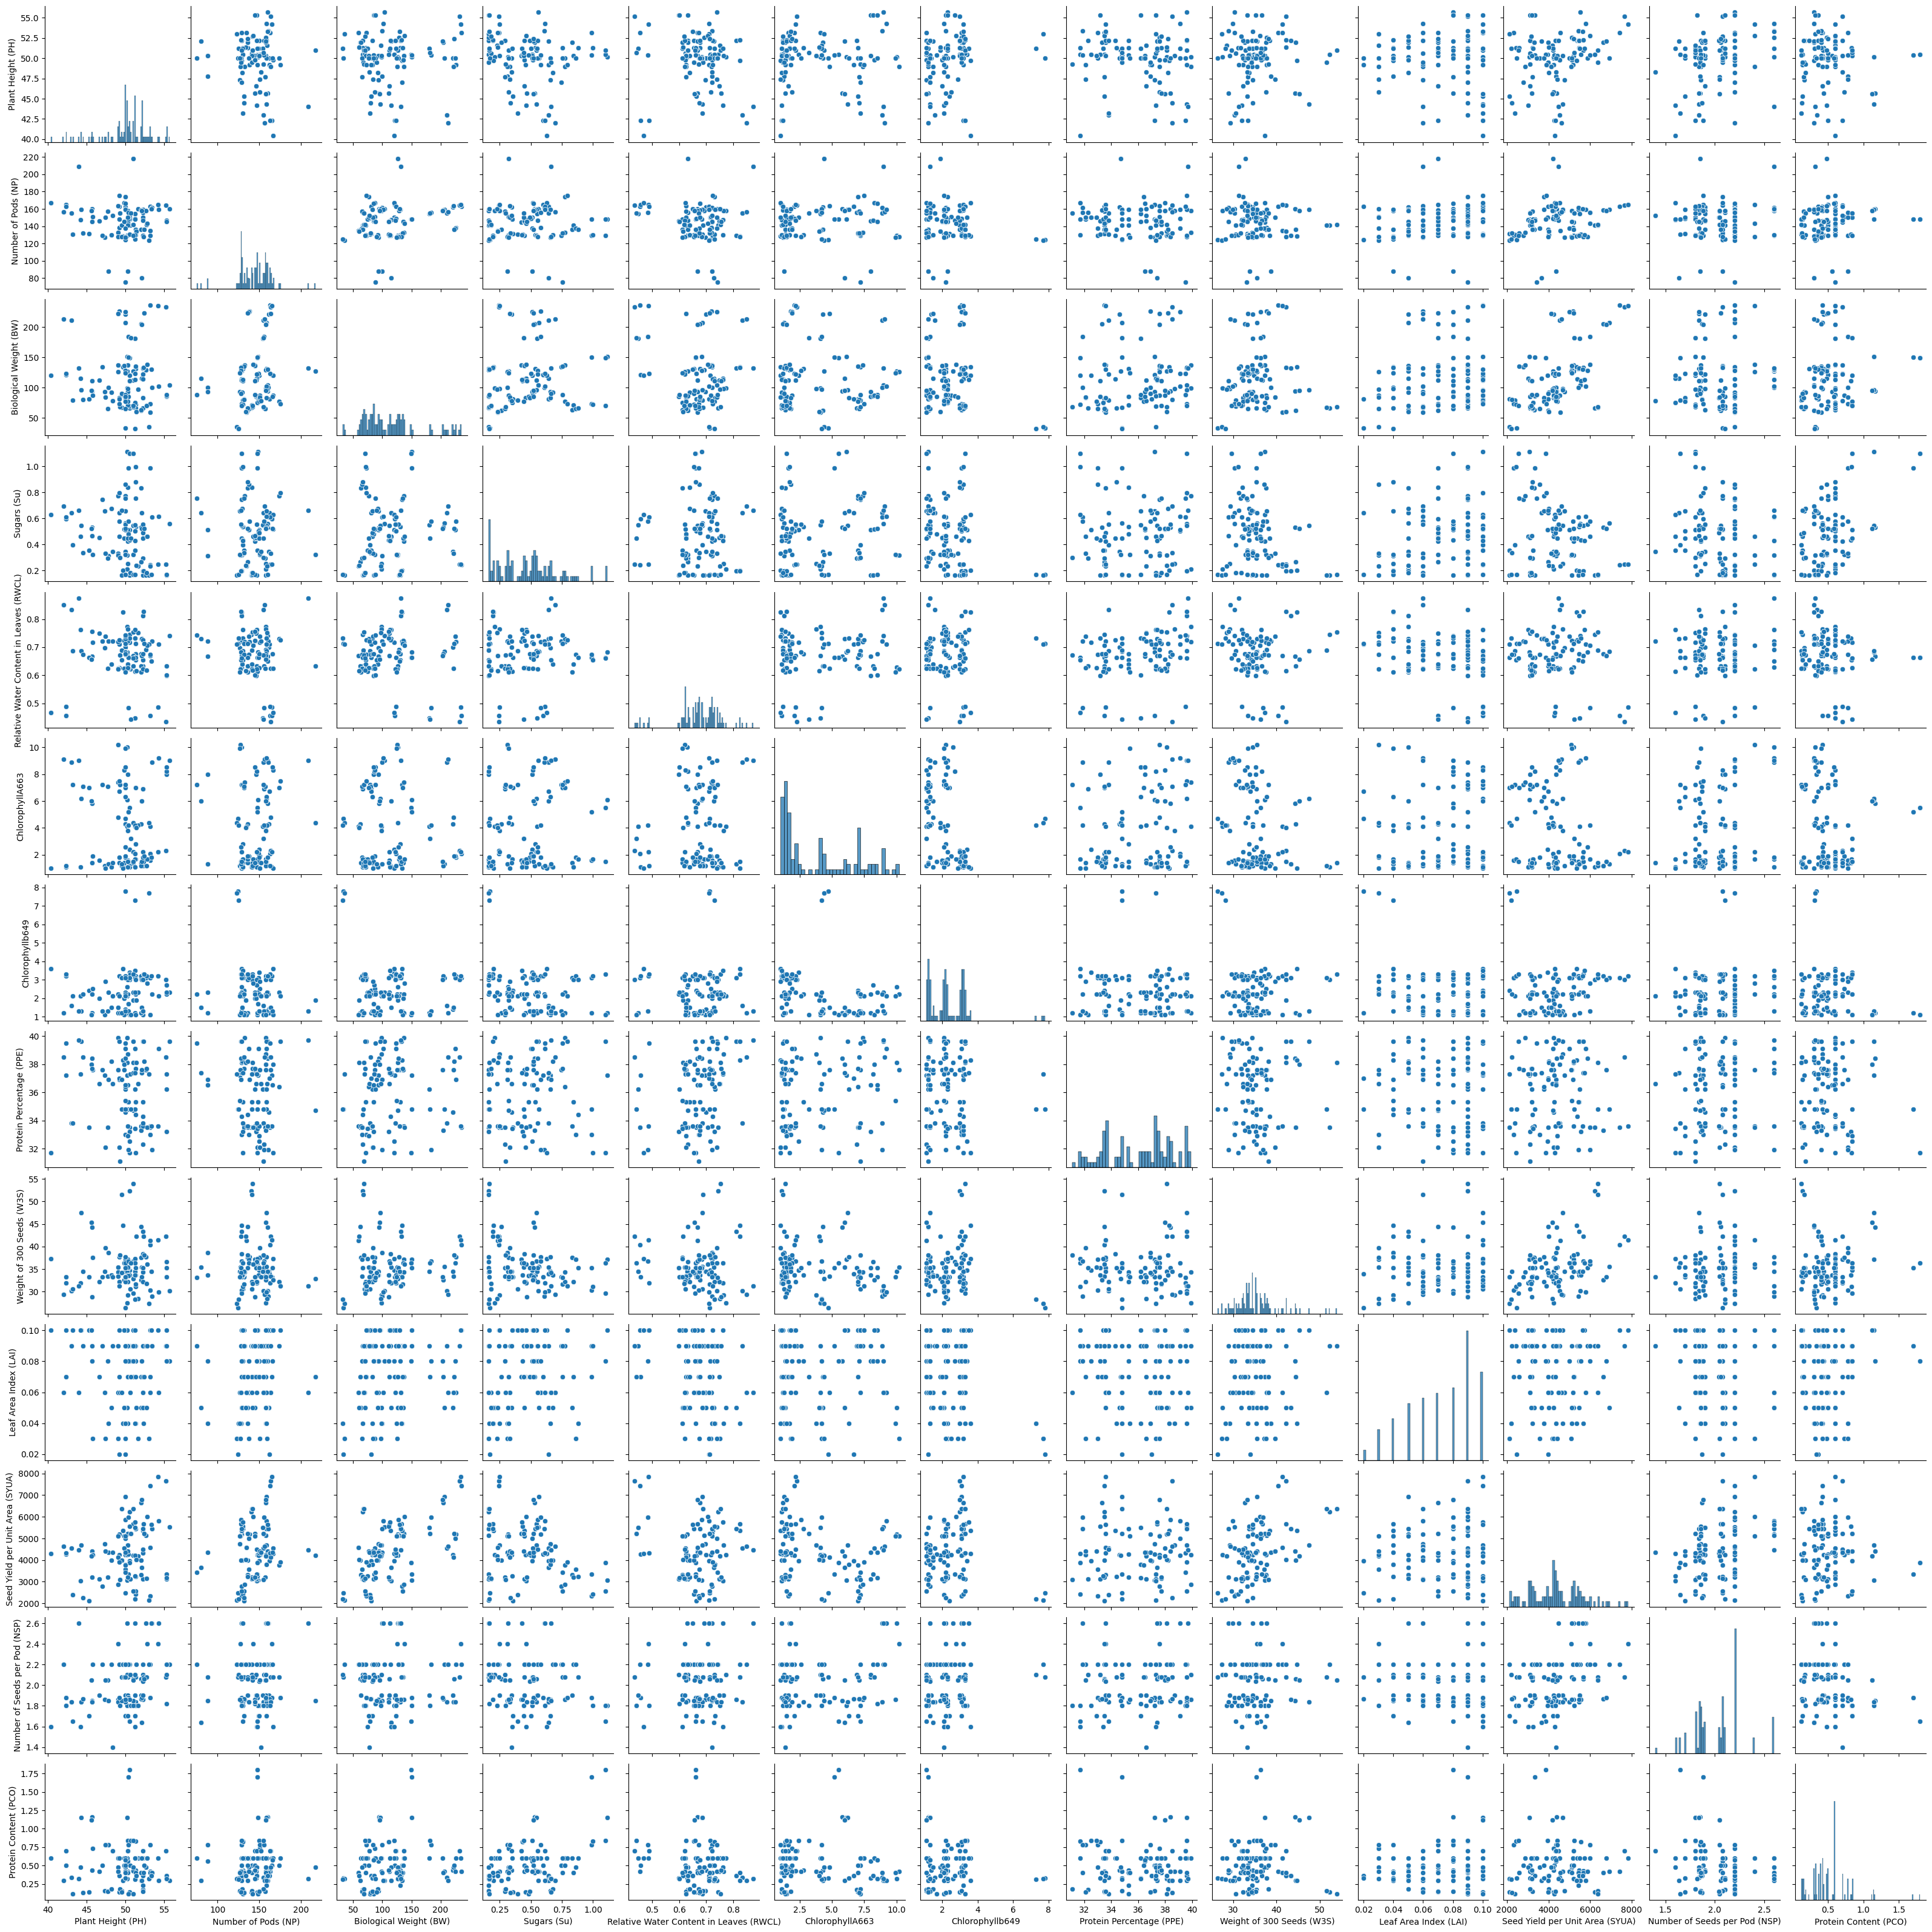


ANOVA Results:
Parameters: F = 15095.34, p = 0.0000
Random : F = 220.16, p = 0.0000


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
file_path = "/content/Advanced Soybean Agricultural Dataset.csv"
df = pd.read_csv(file_path)

# Display basic information
print("Dataset Overview:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

# Check for missing values
print("\nMissing Values Count:")
print(df.isnull().sum())

# Handling missing values (Dropping for simplicity, can also fill)
df = df.dropna()

# Selecting numerical and categorical columns
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Summary statistics
print("\nSummary Statistics:")
print(df[num_cols].describe())

# UNIVARIATE ANALYSIS
# Histograms for numerical columns
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f"Histogram of {col}")
    plt.show()

# Boxplots for each numerical column
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# Violin plots for each numerical column
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.violinplot(y=df[col])
    plt.title(f"Violin Plot of {col}")
    plt.show()

# Line Plots
# for col in num_cols[:3]:  # Limiting to first 3 for clarity
#     plt.figure(figsize=(10, 5))
#     plt.plot(df.index, df[col], marker='o', linestyle='-', label=col)
#     plt.xlabel("Index")
#     plt.ylabel(col)
#     plt.title(f"Line Plot of {col}")
#     plt.legend()
#     plt.show()

# Bar Graphs
if len(cat_cols) > 0:
    for col in cat_cols[:3]:  # Limiting to first 3 for clarity
        plt.figure(figsize=(10, 5))
        sns.countplot(x=df[col])
        plt.xticks(rotation=45)
        plt.title(f"Bar Plot of {col}")
        plt.show()

# Bubble Plot (Interactive with Plotly)
if len(num_cols) > 2:
    fig = px.scatter(df, x=num_cols[0], y=num_cols[1], size=num_cols[2], color=num_cols[2], hover_name=df.index)
    fig.update_layout(title="Interactive Bubble Plot")
    fig.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Pairplot to visualize relationships
sns.pairplot(df[num_cols])
plt.show()

# ANOVA (Analysis of Variance) if categorical columns exist
if len(cat_cols) > 0:
    anova_results = {}
    for col in cat_cols:
        groups = [df[df[col] == cat][num_cols[0]].dropna() for cat in df[col].unique()]
        f_stat, p_value = stats.f_oneway(*groups)
        anova_results[col] = {'F-statistic': f_stat, 'p-value': p_value}

    print("\nANOVA Results:")
    for col, res in anova_results.items():
        print(f"{col}: F = {res['F-statistic']:.2f}, p = {res['p-value']:.4f}")